In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

## 1. Read and visualise the data frame

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
df.shape

(167, 10)

In [4]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Lets see howmany countries are there in the data
df.country.value_counts()

Peru          1
Portugal      1
Armenia       1
Ireland       1
Cape Verde    1
             ..
Thailand      1
Bolivia       1
Iran          1
Madagascar    1
Rwanda        1
Name: country, Length: 167, dtype: int64

## 2. Data Cleaning

In [7]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**There is no null values in the data frame.**

In [8]:
#checking the data types in the data frame
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

**None of the columns have inconsistent datatype, hence no conversion is requried.**

In [20]:
# Change the variables from percentage of Total GDPP to actual values
df['exports']=(df['exports']*df['gdpp'])/100
df['health']=(df['health']*df['gdpp'])/100
df['imports']=(df['imports']*df['gdpp'])/100


In [21]:
df.head()

country  child_mort     exports        health       imports  \
0          Afghanistan        90.2     305.809    231.803222    1373.08241   
1              Albania        16.6   46838.680  10956.905500   81298.56600   
2              Algeria        27.3   76383.744   8294.797200   62459.62400   
3               Angola       119.0   77631.407   3551.356500   53457.26100   
4  Antigua and Barbuda        10.3  677222.000  89750.520000  876667.60000   

    income  inflation  life_expec  total_fer     gdpp  
0   1610.0       9.44        56.2       5.82    553.0  
1   9930.0       4.49        76.3       1.65   4090.0  
2  12900.0      16.10        76.5       2.89   4460.0  
3   5900.0      22.40        60.1       6.16   3530.0  
4  19100.0       1.44        76.8       2.13  12200.0

## 3. Exploratory Data Analysis

In [22]:
#Pair plot for all the numerical variables

plt.figure(figsize = (4,4))
sns.pairplot(df)
plt.show()

<Figure size 288x288 with 0 Axes>

In [23]:
plt.figure(figsize=(15,15))
f=df.columns[1:]
for i in enumerate(f):
    ax = plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]],color = 'green')
    plt.xticks(rotation=20)

**Inferences**

- The Distribution plot highlights the presence of outliers at both the upper and lower ends of the socio-economic spectrum.


- The Distribution plot also highlights the general skewness in the data implying that there is a wide disparity between the two extremes – wealthy and poor countries.


##  4. Checking the outlier

In [24]:
# lets check for outliers in the data set

plt.figure(figsize=(20, 15))
for i, x_var in enumerate(df.columns[1:]):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = x_var, data = df)
cols = df.drop("country",1)


**A special case of Outlier - inflation**

- As we can see from the figure below, there is a special case of outlier for inflation with only one Country - Nigeria with an inflation of more than 100.


- When a model was built for clustering without removing the outlier for inflation, Nigeria was clustered in a separate cluster of its own as the inflation is abnormally high.


- For our analysis purposes, we can cap the inflation outlier also to bring Nigeria on par with the other socio-economically weak countries. But we have to consider this during the final recommendation.

### Outlier treatment

In [25]:
# As we can see there are a number of outliers in the data.

# Keeping in mind we need to identify backward countries based on socio economic and health factors.
# We will cap the outliers to values accordingly for analysis.

q1 = df['child_mort'].quantile(0.01)
q4 = df['child_mort'].quantile(0.99)

df['child_mort'][df['child_mort']<=q1] = q1
df['child_mort'][df['child_mort']>=q4] = q4

q1 = df['health'].quantile(0.01)
q4 = df['health'].quantile(0.99)

df['health'][df['health']<=q1] = q1
df['health'][df['health']>=q4] = q4


q1 = df['life_expec'].quantile(0.01)
q4 = df['life_expec'].quantile(0.99)

df['life_expec'][df['life_expec']<=q1] = q1
df['life_expec'][df['life_expec']>=q4] = q4

q1 = df['total_fer'].quantile(0.01)
q4 = df['total_fer'].quantile(0.99)

df['total_fer'][df['total_fer']<=q1] = q1
df['total_fer'][df['total_fer']>=q4] = q4

q1 = df['income'].quantile(0.01)
q4 = df['income'].quantile(0.99)

df['income'][df['income']<=q1] = q1
df['income'][df['income']>=q4] = q4

q1 = df['inflation'].quantile(0.01)
q4 = df['inflation'].quantile(0.99)

df['inflation'][df['inflation']<=q1] = q1
df['inflation'][df['inflation']>=q4] = q4

q1 = df['gdpp'].quantile(0.01)
q4 = df['gdpp'].quantile(0.99)

df['gdpp'][df['gdpp']<=q1] = q1
df['gdpp'][df['gdpp']>=q4] = q4

q1 = df['imports'].quantile(0.01)
q4 = df['imports'].quantile(0.99)

df['imports'][df['imports']<=q1] = q1
df['imports'][df['imports']>=q4] = q4

q1 = df['exports'].quantile(0.01)
q4 = df['exports'].quantile(0.99)

df['exports'][df['exports']<=q1] = q1
df['exports'][df['exports']>=q4] = q4

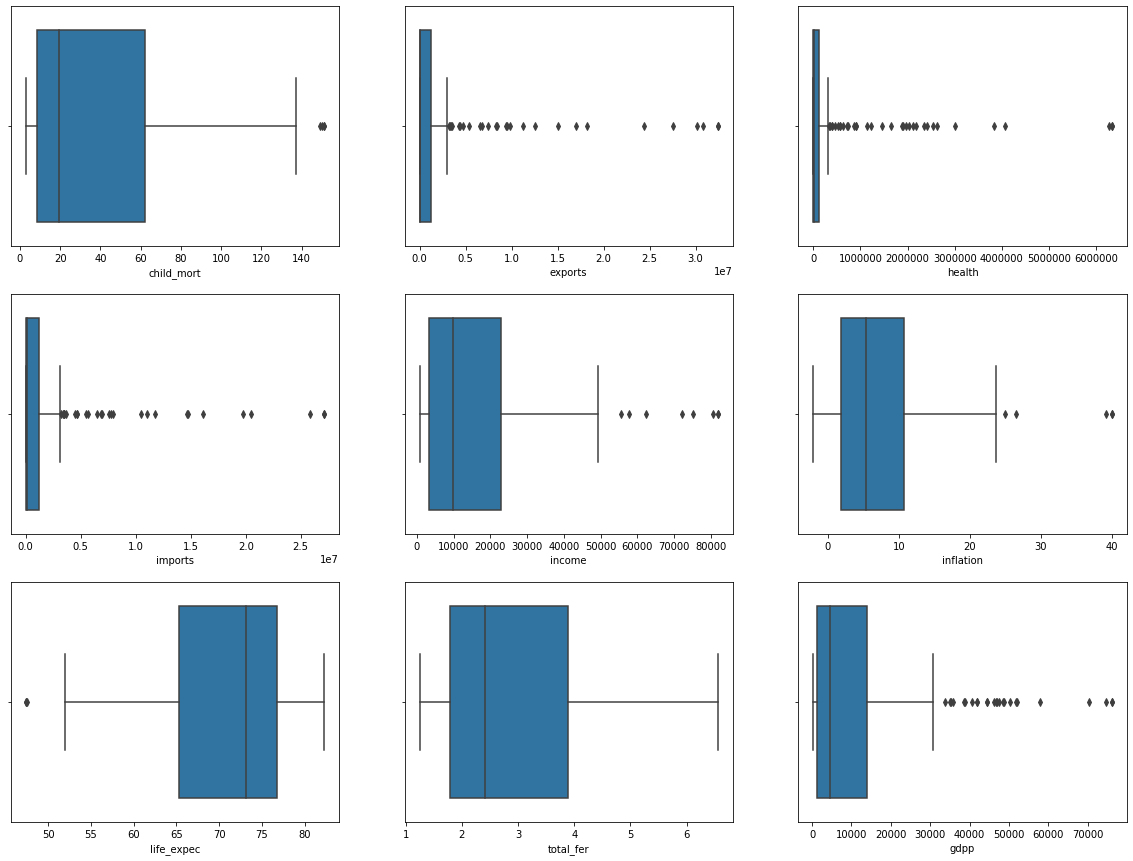

In [26]:
plt.figure(figsize=(20, 15))
for i, x_var in enumerate(df.columns[1:]):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = x_var, data = df)


## 5. Scalling the variables

### Checking the tendency of the data: Hopkins Test

In [27]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [28]:
df.head()

country  child_mort     exports        health       imports  \
0          Afghanistan        90.2     305.809    231.803222    1373.08241   
1              Albania        16.6   46838.680  10956.905500   81298.56600   
2              Algeria        27.3   76383.744   8294.797200   62459.62400   
3               Angola       119.0   77631.407   3551.356500   53457.26100   
4  Antigua and Barbuda        10.3  677222.000  89750.520000  876667.60000   

    income  inflation  life_expec  total_fer     gdpp  
0   1610.0       9.44        56.2       5.82    553.0  
1   9930.0       4.49        76.3       1.65   4090.0  
2  12900.0      16.10        76.5       2.89   4460.0  
3   5900.0      22.40        60.1       6.16   3530.0  
4  19100.0       1.44        76.8       2.13  12200.0

In [29]:
hopkins(df.drop("country", axis = 1))

0.9929786822170552

**For all ten iteration the hopkins is 91% i.e. it is morethan 80%, hence given dataset have the good tendency to farm the clusters.**

### Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(df.drop("country", axis = 1))
df1

array([[ 1.34744166, -0.39195492, -0.38731975, ..., -1.69578764,
         1.92737901, -0.70567224],
       [-0.54796653, -0.38436153, -0.37735587, ...,  0.66361184,
        -0.86606182, -0.50056398],
       [-0.27241126, -0.37954027, -0.37982904, ...,  0.68708845,
        -0.03539836, -0.47910793],
       ...,
       [-0.37542258, -0.38998854, -0.3864446 , ...,  0.28798605,
        -0.66509486, -0.66177432],
       [ 0.47442077, -0.3911647 , -0.38670926, ..., -0.36935908,
         1.15700564, -0.66177432],
       [ 1.16459658, -0.3907178 , -0.3863687 , ..., -2.18879649,
         1.64602526, -0.65307592]])

In [31]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.347442 -0.391955 -0.387320 -0.412608 -0.855416   0.268366   -1.695788   
1   -0.547967 -0.384362 -0.377356 -0.396131 -0.387771  -0.377394    0.663612   
2   -0.272411 -0.379540 -0.379829 -0.400015 -0.220835   1.137206    0.687088   
3    2.089123 -0.379337 -0.384236 -0.401870 -0.614287   1.959082   -1.237994   
4   -0.710209 -0.281494 -0.304155 -0.232161  0.127650  -0.775287    0.722303   

   total_fer      gdpp  
0   1.927379 -0.705672  
1  -0.866062 -0.500564  
2  -0.035398 -0.479108  
3   2.155142 -0.533038  
4  -0.544515 -0.030271

## 6.  Find the best value of K

### Silhouette method

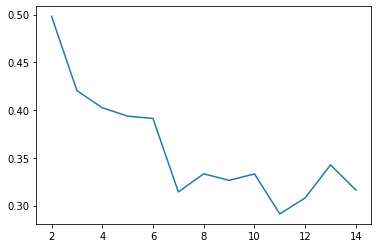

In [32]:
from sklearn.metrics import silhouette_score
# We looks at the maximum value

ss = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

### SSD or Elbow curve

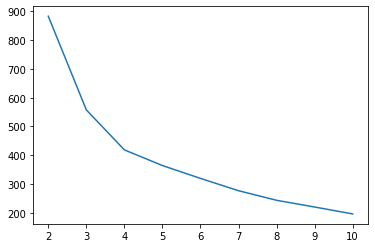

In [33]:
# ssd elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

**Experimental approach - Analyze segments**

- Build clustering at and around elbow solution (k=3 or k=4 in our case)


- Analyze their properties - Build models with multiple k's and analyse the results


- Compare against each other and choose one which makes most business sense


**Observations**

- We can see that the Silhouette score is high for cluster numbers 3 and 4 after which the score is reduced.


- From Analysis perspective also, to provide a good recommendation dividing the countries into 3 or 4 clusters.


- Lesser than 3 clusters will not help us make good recommendation as many countries will be lumped together.


- Having More than 4 clusters will be difficult to do the profiling based on the features

### Final KMeans with K==4

In [34]:
kmean = KMeans(n_clusters = 4, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [35]:
kmean.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 3, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       3, 1, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 3, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [63]:
# Appending the cluster labels to the original capped dataset  
df_cap_kmeans4 = df.copy()
df_cap_kmeans4['cluster_id']=kmeans_4.labels_

**Cluster Profiling for the variables gdpp, income and child_mort**

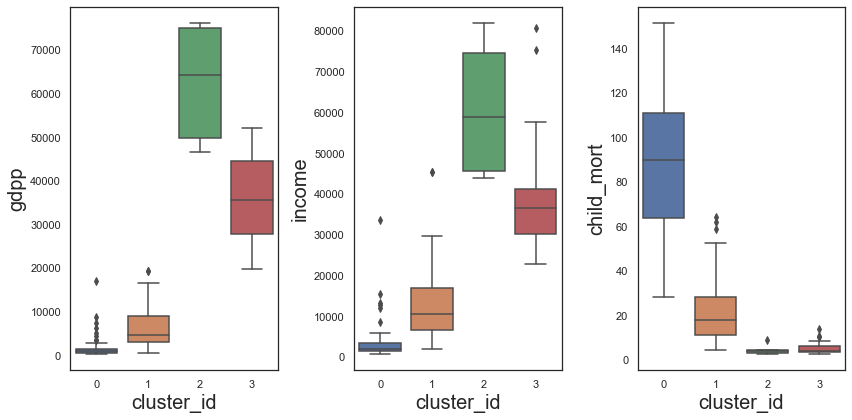

In [69]:
profiling_cols = ['gdpp', 'income', 'child_mort']
sns.set(style='white')

# plt.title('Cluster Profiling based on gdpp, income and child_mort')
plt.figure(figsize=(12,6))

for i, x_var in enumerate(profiling_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(x = df_cap_kmeans4.cluster_id, 
                y = df_cap_kmeans4[x_var])
    plt.ylabel(x_var, fontsize=20)
    plt.xlabel('cluster_id', fontsize=20)
    plt.tight_layout()    
plt.show()    

**Profiling based on columns - 'gdpp', 'income' and 'child_mort'**


Based on the three features, we can arrive at the below profiling for the countries

1. Cluster 0 - Developing Countries - Have low gdpp, low income and low child_mort.


2. Cluster 1 - Developed Countries - Have high gdpp, high income and low child_mort.


3. Cluster 2 - Under-Developed or Poor Countries - Have very low gdpp, very low income and very high child_mort.


3. Cluster 3 - Very Rich Countries - Have very high gdpp, very high income and very low child_mort.

In [70]:
df['cluster_id'] = kmean.labels_

In [71]:
df.head()

country  child_mort     exports        health       imports  \
0          Afghanistan        90.2     305.809    231.803222    1373.08241   
1              Albania        16.6   46838.680  10956.905500   81298.56600   
2              Algeria        27.3   76383.744   8294.797200   62459.62400   
3               Angola       119.0   77631.407   3551.356500   53457.26100   
4  Antigua and Barbuda        10.3  677222.000  89750.520000  876667.60000   

    income  inflation  life_expec  total_fer     gdpp  cluster_id  \
0   1610.0       9.44        56.2       5.82    553.0           0   
1   9930.0       4.49        76.3       1.65   4090.0           2   
2  12900.0      16.10        76.5       2.89   4460.0           2   
3   5900.0      22.40        60.1       6.16   3530.0           0   
4  19100.0       1.44        76.8       2.13  12200.0           2   

   cluster_labels  
0               0  
1               0  
2               0  
3               0  
4               0

In [72]:
# Let's check how may data points we have in each cluster
df.cluster_id.value_counts()

2    83
0    48
1    28
3     8
Name: cluster_id, dtype: int64

In [73]:
df[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean()

child_mort        income          gdpp
cluster_id                                        
0            90.241917   3901.608400   1911.466283
1             5.425000  39289.285714  35710.714286
2            21.771084  12460.120482   6411.710843
3             4.387500  61108.290000  62593.980000

In [74]:
c1 = df[df['cluster_id']==1]
c1.head()

country  child_mort     exports      health     imports   income  \
7   Australia         4.8   5333347.8  2351521.53   5629644.9  41400.0   
8     Austria         4.3  11283999.3  2419571.00  10514135.8  43200.0   
10    Bahamas        13.8   2744000.0   618576.00   3426080.0  22900.0   
11    Bahrain         8.6   2978005.5   212959.53   2181014.1  41100.0   
15    Belgium         4.5  15061190.4  2109355.20  14726059.2  41100.0   

    inflation  life_expec  total_fer     gdpp  cluster_id  cluster_labels  
7       1.160        82.0       1.93  51900.0           1               1  
8       0.873        80.5       1.44  46900.0           1               1  
10     -0.393        73.8       1.86  28000.0           1               0  
11      7.440        76.0       2.16  20700.0           1               0  
15      1.880        80.0       1.86  44400.0           1               1

In [75]:
c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

country  child_mort    exports     health    imports   income  \
43   Czech Republic         3.4  2587464.0  308927.52  2465931.6  28300.0   
11          Bahrain         8.6  2978005.5  212959.53  2181014.1  41100.0   
98            Malta         6.8  6811713.0  385106.65  6856234.0  28300.0   
138     South Korea         4.1  2412745.4  338468.13  2256454.2  30400.0   
122        Portugal         3.9  1513687.5  556875.00  1893375.0  27200.0   
135        Slovenia         3.2  3520810.8  515253.96  3444152.4  28700.0   
60           Greece         3.9  1599178.1  745318.30  2221482.7  28700.0   
10          Bahamas        13.8  2744000.0  618576.00  3426080.0  22900.0   
74           Israel         4.6  3277260.0  714442.68  3080624.4  29600.0   
139           Spain         3.8  2403349.5  899135.46  2525873.2  32500.0   

     inflation  life_expec  total_fer     gdpp  cluster_id  cluster_labels  
43      -1.430        77.5   1.510000  19800.0           1               0  
11       7.440        76.0   2.160000  20700.0           1               0  
98       3.830        80.3   1.360000  21100.0           1               0  
138      3.160        80.1   1.247688  22100.0           1               0  
122      0.643        79.8   1.390000  22500.0           1               0  
135     -0.987        79.5   1.570000  23400.0           1               0  
60       0.673        80.4   1.480000  26900.0           1               0  
10      -0.393        73.8   1.860000  28000.0           1               0  
74       1.770        81.4   3.030000  30600.0           1               0  
139      0.160        81.9   1.370000  30700.0           1               0

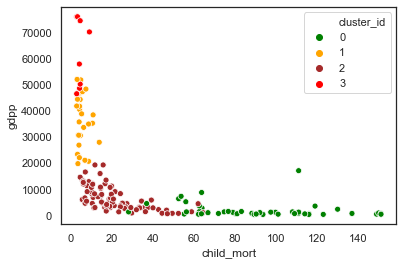

In [93]:
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_id',legend='full',data=df,palette=['green','orange','brown','red'])

In [94]:
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',legend='full',data=df,palette=['green','orange','brown','red'])

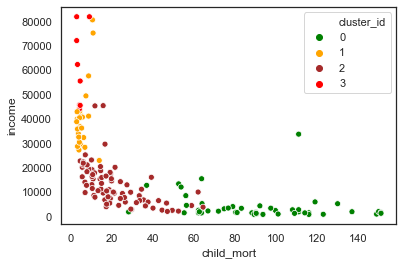

In [95]:
sns.scatterplot(x='child_mort',y='income',hue='cluster_id',legend='full',data=df,palette=['green','orange','brown','red'])

## 7. Hierarchical Clustering

### Hierarchical Clustering Dendrogram for Single linkage

In [78]:
# Plot the Hierarchical Clustering Dendrogram for Single linkage
def plot_dendrogram_single(data):
    plt.figure(figsize=(15,8))             
    sns.set_style('white')              

    # setting the labels on axes and title
    plt.title('Hierarchical Clustering Dendrogram - Single linkage',fontsize=20)
    plt.xlabel('Country',fontsize=20)
    plt.ylabel('Values',fontsize=20)

    mergings_s = linkage(data, method = "single", metric='euclidean') # Use the df_scaled dataset
    dendrogram(mergings_s, labels=data.index, leaf_rotation=90, leaf_font_size=6)
    plt.show()
    return mergings_s

In [79]:
# Plot the Hierarchical Clustering Dendrogram for Complete linkage
def plot_dendrogram_complete(data):
    plt.figure(figsize=(15,8))             
    sns.set_style('white')                  

    # setting the labels on axes and title
    plt.title('Hierarchical Clustering Dendrogram - Complete linkage',fontsize=20)
    plt.xlabel('Country',fontsize=20)
    plt.ylabel('Values',fontsize=20)

    mergings_c = linkage(data, method = "complete", metric='euclidean')
    dendrogram(mergings_c, labels=data.index, leaf_rotation=90, leaf_font_size=6)
    plt.show()
    return mergings_c

### Plot Hierarchical Clustering Dendrogram - Single linkage

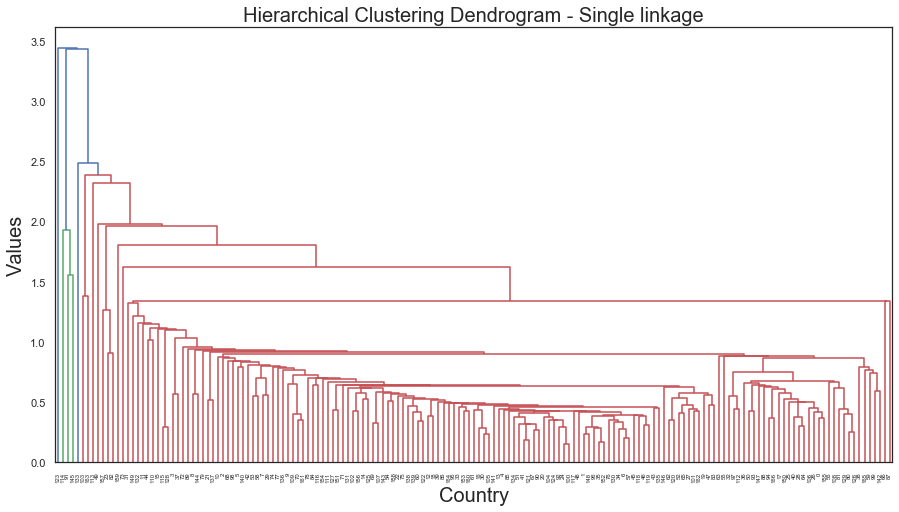

In [80]:
# Plot the dendrogram for the normalized dataset with single linkage
mergings_s = plot_dendrogram_single(df1)

### Plot Hierarchical Clustering Dendrogram - Complete linkage

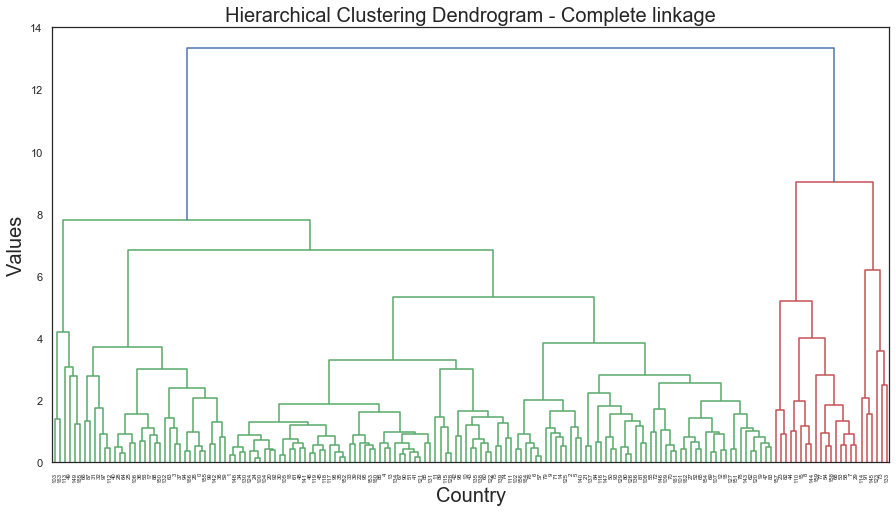

In [81]:
# Plot the dendrogram for the normalized dataset with complete linkage
mergings_c = plot_dendrogram_complete(df1)

In [84]:
# Let's check how may data points we have in each cluster
df.cluster_id.value_counts()

2    83
0    48
1    28
3     8
Name: cluster_id, dtype: int64

In [85]:
df[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean()

child_mort        income          gdpp
cluster_id                                        
0            90.241917   3901.608400   1911.466283
1             5.425000  39289.285714  35710.714286
2            21.771084  12460.120482   6411.710843
3             4.387500  61108.290000  62593.980000

In [86]:
c1 = df[df['cluster_id']==1]
c1.head()

country  child_mort     exports      health     imports   income  \
7   Australia         4.8   5333347.8  2351521.53   5629644.9  41400.0   
8     Austria         4.3  11283999.3  2419571.00  10514135.8  43200.0   
10    Bahamas        13.8   2744000.0   618576.00   3426080.0  22900.0   
11    Bahrain         8.6   2978005.5   212959.53   2181014.1  41100.0   
15    Belgium         4.5  15061190.4  2109355.20  14726059.2  41100.0   

    inflation  life_expec  total_fer     gdpp  cluster_id  cluster_labels  
7       1.160        82.0       1.93  51900.0           1               1  
8       0.873        80.5       1.44  46900.0           1               1  
10     -0.393        73.8       1.86  28000.0           1               0  
11      7.440        76.0       2.16  20700.0           1               0  
15      1.880        80.0       1.86  44400.0           1               1

In [87]:
c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

country  child_mort    exports     health    imports   income  \
43   Czech Republic         3.4  2587464.0  308927.52  2465931.6  28300.0   
11          Bahrain         8.6  2978005.5  212959.53  2181014.1  41100.0   
98            Malta         6.8  6811713.0  385106.65  6856234.0  28300.0   
138     South Korea         4.1  2412745.4  338468.13  2256454.2  30400.0   
122        Portugal         3.9  1513687.5  556875.00  1893375.0  27200.0   
135        Slovenia         3.2  3520810.8  515253.96  3444152.4  28700.0   
60           Greece         3.9  1599178.1  745318.30  2221482.7  28700.0   
10          Bahamas        13.8  2744000.0  618576.00  3426080.0  22900.0   
74           Israel         4.6  3277260.0  714442.68  3080624.4  29600.0   
139           Spain         3.8  2403349.5  899135.46  2525873.2  32500.0   

     inflation  life_expec  total_fer     gdpp  cluster_id  cluster_labels  
43      -1.430        77.5   1.510000  19800.0           1               0  
11       7.440        76.0   2.160000  20700.0           1               0  
98       3.830        80.3   1.360000  21100.0           1               0  
138      3.160        80.1   1.247688  22100.0           1               0  
122      0.643        79.8   1.390000  22500.0           1               0  
135     -0.987        79.5   1.570000  23400.0           1               0  
60       0.673        80.4   1.480000  26900.0           1               0  
10      -0.393        73.8   1.860000  28000.0           1               0  
74       1.770        81.4   3.030000  30600.0           1               0  
139      0.160        81.9   1.370000  30700.0           1               0

In [97]:
# scatterplot for income,gdpp for different cluster ids
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',legend='full',data=df,palette=['green','orange','brown','red'])

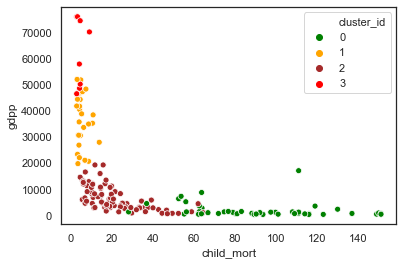

In [98]:
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_id',legend='full',data=df,palette=['green','orange','brown','red'])

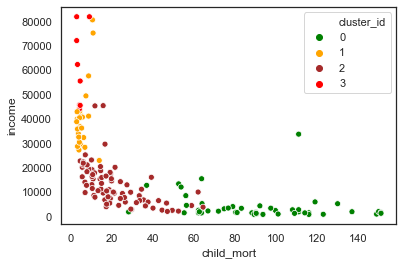

In [99]:
sns.scatterplot(x='child_mort',y='income',hue='cluster_id',legend='full',data=df,palette=['green','orange','brown','red'])

## 8. Conclusion and Final Recommendations:

- We can see that after the ranking of Countries based on socio-economic factor, the countries recommended for Financial aid by the KMeans algorithm and Hierarchical clustering are the same.


**Here are the final list of Countries recommended:**


The final list of 10 Countries recommended for financial aid from KMeans clusters and Hierarchical clusters are:
